In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline

define_outcome = pd.read_csv('listings.csv')

In [4]:
# Count the number of columns and rows
print(define_outcome.shape)

(3818, 92)


In [5]:
# Count the number of each data type
define_outcome.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [6]:
# Display the name of the float data type column
define_outcome.dtypes[df_lis.dtypes=='float64']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [7]:
# Display the name of the int data type column
define_outcome.dtypes[df_lis.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [8]:
# Display the object data type
pd.set_option('display.max_rows', 92)
define_outcome.dtypes[df_lis.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

In [9]:
# Display the missing value sort by descending
define_outcome.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [10]:
# Display the values which are visible and unique
define_outcome.nunique()[define_outcome.nunique()==len(define_outcome)]

id             3818
listing_url    3818
picture_url    3818
latitude       3818
longitude      3818
dtype: int64

In [11]:
# Display the values which are missing and unique
define_outcome.nunique()[define_outcome.nunique() != len(define_outcome)].sort_values(ascending=False)

name                                3792
description                         3742
medium_url                          3498
thumbnail_url                       3498
xl_picture_url                      3498
summary                             3478
amenities                           3284
space                               3119
host_id                             2751
host_url                            2751
host_picture_url                    2743
host_thumbnail_url                  2743
transit                             2574
neighborhood_overview               2506
host_about                          2011
notes                               1999
host_name                           1466
street                              1442
host_since                          1380
first_review                         984
reviews_per_month                    654
weekly_price                         395
availability_365                     363
monthly_price                        356
last_review     

### Question 1: What are the most common amenities that are available in Seattle Airbnb dataset?

In [12]:
# Show the amenities available list
amenities_available = []

for i in range(len(define_outcome)):
    amenities_available.append(df_lis['amenities'][i])

amenities_available = list((s.strip('\'\{\}') for s in amenities_available))
str_amenities_available = ",".join(amenities_available)
amenities_available = list(set(str_amenities_available.split(",")))

amenities_missing = []
for string in amenities_available:
    if (string != ""):
        amenities_missing.append(string)
amenities_available = amenities_missing

In [17]:
# Display the number which contains each amenity in the amenities list.
def display_number(call, column1, column2, find):
    '''
    call - the desired data
    column1 - label of column that you want to clear
    column2 - label of column that you want to count
    find - string list define
    df_showup - this is the dataframe of each find string list
    '''
    df_showup = defaultdict(int)
    for val in find:
        for idx in range(call.shape[0]):
            if val in call[column1][idx]:
                df_showup[val] += int(call[column2][idx])
    df_showup = pd.DataFrame(pd.Series(df_showup)).reset_index()
    df_showup.columns = [column1, column2]
    df_showup.sort_values('count', ascending=False, inplace=True)
    return df_showup

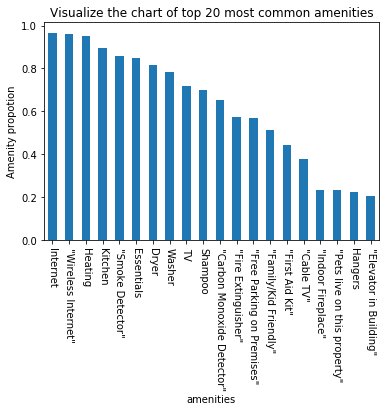

In [27]:
# Visualize the chart of top 20 most common amenities
vis_amenity = define_outcome['amenities'].value_counts().reset_index()
vis_amenity.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

define_vis_amenity = display_number(vis_amenity, 'amenities', 'count', amenities_available)
define_vis_amenity.set_index('amenities', inplace=True)

(define_vis_amenity/len(define_outcome))[:20].plot(kind='bar', legend=None);
plt.xticks(rotation = -90);
plt.title('Visualize the chart of top 20 most common amenities');
plt.ylabel('Amenity propotion')
plt.figure(figsize = [10, 8])
plt.show()

### Observe:
- Internet has the highest propotion
- Elevator in Buiding has the lowest propotion

### Question 2: I would like to know about some features which have property_type amenities columns

In [33]:
# Use the availability_30 column to find the missing value
define_outcome['availability_30'].isnull().sum()

0

In [36]:
# Define new column by using the column above (availability_30)
define_outcome['reserve_propotion'] = 1 - (define_outcome['availability_30']/30)

In [37]:
define_outcome['reserve_propotion'].head()

0    0.533333
1    0.566667
2    0.966667
3    1.000000
4    0.000000
Name: reserve_propotion, dtype: float64

In [38]:
# Investige the room type to see if it attract the customer
define_outcome['room_type'].isnull().sum()

0

In [39]:
# Display the unique value of room type column
define_outcome['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [40]:
# Display the reserve propotion information
define_outcome.groupby(['room_type'])['reserve_propotion'].mean().sort_values(ascending=False)

room_type
Entire home/apt    0.483353
Private room       0.362759
Shared room        0.279202
Name: reserve_propotion, dtype: float64

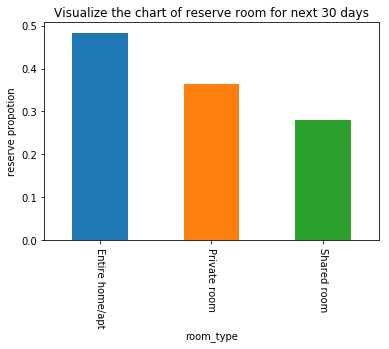

In [45]:
# Visualize the chart of reserve room for next 30 days
(define_outcome.groupby(['room_type'])['reserve_propotion'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.xticks(rotation = -90);
plt.ylabel('reserve propotion')
plt.title('Visualize the chart of reserve room for next 30 days');
plt.figure(figsize = [10, 8])
plt.show()

### Observe:
- Entire home/apt has the highest reserve propotion
- While shared room has the lowest reverve propotion

### Question 3: My last question is: I would like to know how about the amenities and propotion of thems

In [46]:
# Find out the missing value of amenity
define_outcome['amenities'].isnull().sum()

0

In [47]:
# Define new column
for i in range(len(amenities_available)):
    define_outcome[amenities_available[i]] = 0

In [55]:
# Input value in new amenity column
for i in range(len(amenities_available)):
    for t in range(len(define_outcome)):
        if amenities_available[i] in define_outcome['amenities'][t]:
            define_outcome.loc[t , amenities_available[i]] = 1
        else:
            define_outcome.loc[t , amenities_available[i]] = 0

In [56]:
# Visualize the chart of amenity type and the reserve propotion of thems
type_of_amenity = pd.DataFrame(index=range(0,len(amenities_available)), 
                columns = ["Label of Amenity", "Reserve propotion with amenity",
                                  "Reserve propotion without amenity", "Reserve deviant"])
                               
for i in range(len(amenities_available)):
    type_of_amenity['Label of Amenity'][i] = amenities_available[i]
    type_of_amenity['Reserve propotion with amenity'][i] = define_outcome.groupby([amenities_available[i]])['reserve_propotion'].mean()[1]
    type_of_amenity['Reserve propotion without amenity'][i] = define_outcome.groupby([amenities_available[i]])['reserve_propotion'].mean()[0]
    type_of_amenity['Reserve deviant'][i] = type_of_amenity['Reserve propotion with amenity'][i] - type_of_amenity['Reserve propotion without amenity'][i]

type_of_amenity.set_index('Label of Amenity', inplace=True)

In [57]:
type_of_amenity.sort_values(by='Reserve deviant', ascending = False)[:8]

,Reserve propotion with amenity,Reserve propotion without amenity,Reserve deviant
Label of Amenity,,,
"""Washer / Dryer""",0.616667,0.440365,0.176302
Kitchen,0.451154,0.347764,0.10339
Cat(s),0.486649,0.435322,0.0513271
"""Pets Allowed""",0.47959,0.434937,0.0446532
"""Other pet(s)""",0.48366,0.439873,0.0437876
Dryer,0.448523,0.404782,0.0437406
Washer,0.449543,0.407546,0.0419968
"""Smoke Detector""",0.445992,0.406642,0.0393502


### Observe
- Washer/ Dryer has the highest reserve propotion with amenity, without amenity and reserve deviant also
- Smoke Detector has the lowest reserve propotion in all 3 types.